In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data Loading
df = pd.read_csv("/content/drive/MyDrive/EDA Project (mid sem)/WDICSV.csv")
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.001597,18.558234,19.043572,19.586457,20.192064,20.828814,21.372164,22.100884,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.096003,7.406706,7.666648,8.020952,8.403358,8.718306,9.097176,9.473374,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.488233,38.779953,39.068462,39.445526,39.818645,40.276374,40.687817,41.211606,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,33.922276,38.859598,40.223744,43.035073,44.390861,46.282371,48.127211,48.801258,50.668330,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.527554,24.627753,25.432092,27.061929,29.154282,31.022083,32.809138,33.783960,35.375216,NaN


In [3]:
# Countries and indicator codes filtered
Countries = ["USA", "CAN", "DEU", "IND", "CHN", "BRA", "ZAF", "JPN"]
Indicator_codes = [
    "SP.DYN.LE00.IN",     # Life expectancy
    "NY.GDP.PCAP.CD",     # GDP per capita (current US$)
    "SP.URB.TOTL.IN.ZS",  # Urban population (% of total)
    "SH.XPD.CHEX.PC.CD",  # Health expenditure per capita (US$)
    "EG.ELC.ACCS.ZS",     # Access to electricity (% of population)
]

# Typecasting Year to str
YEAR_START, YEAR_END = 1960, 2022
year_cols = [str(y) for y in range(YEAR_START, YEAR_END + 1)]

df = df[df["Indicator Code"].isin(Indicator_codes) & df["Country Code"].isin(Countries)]

# Filtering columns
keep_cols = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"] + year_cols
df = df[keep_cols]

# Converting year columns to rows using melt
tidy = df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Value"
)

# Typecasting year and value to int
tidy["Year"]  = tidy["Year"].astype(int)
tidy["Value"] = pd.to_numeric(tidy["Value"], errors="coerce")

print("Shape (with NaNs kept):", tidy.shape)
print("Total NaNs in Value:", tidy["Value"].isna().sum())


Shape (with NaNs kept): (2520, 6)
Total NaNs in Value: 579


In [4]:
tidy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Brazil,BRA,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
1,Brazil,BRA,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,1960,NaN
2,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,235.26601
3,Brazil,BRA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,53.16200
4,Brazil,BRA,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1960,46.13900


In [5]:
tidy

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Brazil,BRA,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
1,Brazil,BRA,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,1960,NaN
2,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,235.266010
3,Brazil,BRA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,53.162000
4,Brazil,BRA,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1960,46.139000
...,...,...,...,...,...,...
2515,United States,USA,Access to electricity (% of population),EG.ELC.ACCS.ZS,2022,100.000000
2516,United States,USA,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,2022,12434.433594
2517,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,2022,77860.911291
2518,United States,USA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2022,77.434146


In [6]:
# Adding "isna" to check if there are nan values [1 = missing, 0 = not missing]
tidy["is_na"] = tidy["Value"].isna().astype(int)

# Counting missing values per year
miss_by_year = (
    tidy.groupby("Year")["is_na"]
        .sum()
        .reset_index(name="missing_count")
        .sort_values("Year")
)

print("Missing cells by year (head):")
print(miss_by_year.head().to_string(index=False))
print("\nMissing cells by year (tail):")
print(miss_by_year.tail().to_string(index=False))

# Finding timeframe without any missing values
pre_mask  = (tidy["Year"] >= 1960) & (tidy["Year"] <= 1999)
post_mask = (tidy["Year"] >= 2000) & (tidy["Year"] <= 2022)

pre_missing_total  = tidy.loc[pre_mask,  "is_na"].sum()
post_missing_total = tidy.loc[post_mask, "is_na"].sum()

print(f"\nTotal missing cells 1960–1999: {pre_missing_total}")
print(f"Total missing cells 2000–2022: {post_missing_total}")


Missing cells by year (head):
 Year  missing_count
 1960             16
 1961             16
 1962             16
 1963             16
 1964             16

Missing cells by year (tail):
 Year  missing_count
 2018              0
 2019              0
 2020              0
 2021              0
 2022              0

Total missing cells 1960–1999: 579
Total missing cells 2000–2022: 0


In [7]:
# tidy['is_na']
# miss_by_year
# pre_missing_total, post_missing_total


In [8]:
start_clean = 2000
end_clean = 2022

mask_years = (tidy["Year"] >= start_clean) & (tidy["Year"] <= end_clean)
analysis = tidy.loc[mask_years].copy()

# Verification checks
print(f"Analysis window: {start_clean}–{end_clean}")
print(f"Shape of analysis DataFrame: {analysis.shape}")
print("NaNs check in analysis['Value']:", analysis["Value"].isna().sum())
print("Years span check:", analysis["Year"].min(), "to", analysis["Year"].max())
print("Rows per year check (expected 40):", analysis.groupby("Year")["Value"].count().unique())


Analysis window: 2000–2022
Shape of analysis DataFrame: (920, 7)
NaNs check in analysis['Value']: 0
Years span check: 2000 to 2022
Rows per year check (expected 40): [40]


In [9]:
# Confirm no NaNs in the analysis window
print("NaNs in analysis:", analysis["Value"].isna().sum())

# Confirm year span
print("Years in analysis:", analysis["Year"].min(), "to", analysis["Year"].max())

# Confirm expected series count per year (5 indicators × 8 countries = 40)
per_year_counts = (analysis.groupby("Year")["Value"].count().reset_index(name="count"))
per_year_counts.head(),per_year_counts.tail()


NaNs in analysis: 0
Years in analysis: 2000 to 2022


(   Year  count
 0  2000     40
 1  2001     40
 2  2002     40
 3  2003     40
 4  2004     40,
     Year  count
 18  2018     40
 19  2019     40
 20  2020     40
 21  2021     40
 22  2022     40)

In [10]:
# Data analysis using descriptive statistics

# Statistical summary for all the countries across all the indicators

desc_ind = (
    analysis.groupby("Indicator Name")["Value"]
            .describe()
            .round(2)
            .reset_index()
            .sort_values("Indicator Name")
)
desc_ind


,Indicator Name,count,mean,std,min,25%,50%,75%,max
0,Access to electricity (% of population),184.0,94.97,9.42,60.30,96.65,100.00,100.00,100.00
1,Current health expenditure per capita (current...,184.0,2785.56,2922.11,18.48,353.99,1515.76,4692.88,12434.43
2,GDP per capita (current US$),184.0,24534.88,20699.43,442.75,5633.56,18609.36,43105.24,77860.91
3,"Life expectancy at birth, total (years)",184.0,74.77,7.56,53.91,70.41,77.22,80.62,84.56
4,Urban population (% of total population),184.0,69.49,19.03,27.67,59.11,78.15,81.92,91.96


In [11]:
# Statistical summary for individual countries across all indicators
desc_cty_ind = (
    analysis.groupby(["Indicator Name","Country Name","Country Code"])["Value"]
            .describe()
            .round(2)
            .reset_index()
            .sort_values(["Indicator Name","Country Code"])
)
desc_cty_ind


,Indicator Name,Country Name,Country Code,count,mean,std,min,25%,50%,75%,max
0,Access to electricity (% of population),Brazil,BRA,23.0,98.51,1.53,94.40,97.35,99.30,99.70,100.00
1,Access to electricity (% of population),Canada,CAN,23.0,100.00,0.00,100.00,100.00,100.00,100.00,100.00
2,Access to electricity (% of population),China,CHN,23.0,99.04,1.19,96.70,98.05,99.90,100.00,100.00
3,Access to electricity (% of population),Germany,DEU,23.0,100.00,0.00,100.00,100.00,100.00,100.00,100.00
4,Access to electricity (% of population),India,IND,23.0,79.68,13.04,60.30,68.35,79.50,90.70,99.60
5,Access to electricity (% of population),Japan,JPN,23.0,100.00,0.00,100.00,100.00,100.00,100.00,100.00
7,Access to electricity (% of population),United States,USA,23.0,100.00,0.00,100.00,100.00,100.00,100.00,100.00
6,Access to electricity (% of population),South Africa,ZAF,23.0,82.54,4.68,70.20,80.75,83.60,85.20,90.00
8,Current health expenditure per capita (current...,Brazil,BRA,23.0,689.64,273.80,248.38,438.74,768.27,893.15,1043.35
9,Current health expenditure per capita (current...,Canada,CAN,23.0,4392.72,1333.74,1988.16,3512.04,4660.80,5306.81,6483.38


In [12]:
# Statistical Summary for the most recent year, i.e. 2022, in the dataset
latest = analysis[analysis["Year"] == end_clean].copy()

rank_latest = (
    latest.sort_values(["Indicator Name","Value"], ascending=[True, False])
          [["Indicator Name","Country Name","Country Code","Year","Value"]]
)
rank_latest


,Indicator Name,Country Name,Country Code,Year,Value
2480,Access to electricity (% of population),Brazil,BRA,2022,100.000000
2485,Access to electricity (% of population),Canada,CAN,2022,100.000000
2490,Access to electricity (% of population),China,CHN,2022,100.000000
2495,Access to electricity (% of population),Germany,DEU,2022,100.000000
2505,Access to electricity (% of population),Japan,JPN,2022,100.000000
2515,Access to electricity (% of population),United States,USA,2022,100.000000
2500,Access to electricity (% of population),India,IND,2022,99.200000
2510,Access to electricity (% of population),South Africa,ZAF,2022,86.500000
2516,Current health expenditure per capita (current...,United States,USA,2022,12434.433594
2486,Current health expenditure per capita (current...,Canada,CAN,2022,6255.027832


In [13]:
# Comparing the indicators with other indicators to find correlation
wide_one_year = latest.pivot_table(
    index=["Country Name","Country Code"],
    columns="Indicator Name",
    values="Value"
).reset_index()

corr_indicators = wide_one_year.drop(columns=["Country Name","Country Code"]).corr().round(3)
corr_indicators


Indicator Name,Access to electricity (% of population),Current health expenditure per capita (current US$),GDP per capita (current US$),"Life expectancy at birth, total (years)",Urban population (% of total population)
Indicator Name,,,,,
Access to electricity (% of population),1.000,0.334,0.385,0.790,0.173
Current health expenditure per capita (current US$),0.334,1.000,0.979,0.466,0.483
GDP per capita (current US$),0.385,0.979,1.000,0.585,0.535
"Life expectancy at birth, total (years)",0.790,0.466,0.585,1.000,0.538
Urban population (% of total population),0.173,0.483,0.535,0.538,1.000


**2. Data Visualization**

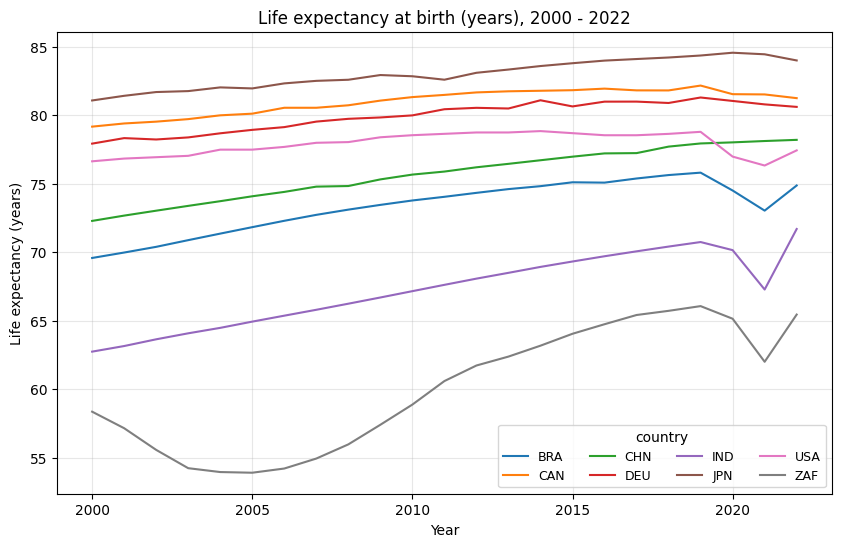

In [14]:
import matplotlib.pyplot as plt

# Analyzing "Life Expectancy" over years using LINE CHART

start_year = 2000
end_year = 2022

# indicator code for life expectancy
life_expectancy_code = "SP.DYN.LE00.IN"

# subset and order the data for life expectancy
life_expectancy = (
    analysis[analysis["Indicator Code"] == life_expectancy_code]
)

plt.figure(figsize=(10, 6))
for country_code, country_series in life_expectancy.groupby("Country Code"):
    plt.plot(country_series["Year"], country_series["Value"], label=country_code)

plt.title("Life expectancy at birth (years), 2000 - 2022")
plt.xlabel("Year")
plt.ylabel("Life expectancy (years)")
plt.legend(title="country", ncol=4, fontsize=9)
plt.grid(True, alpha=0.3)
plt.show()


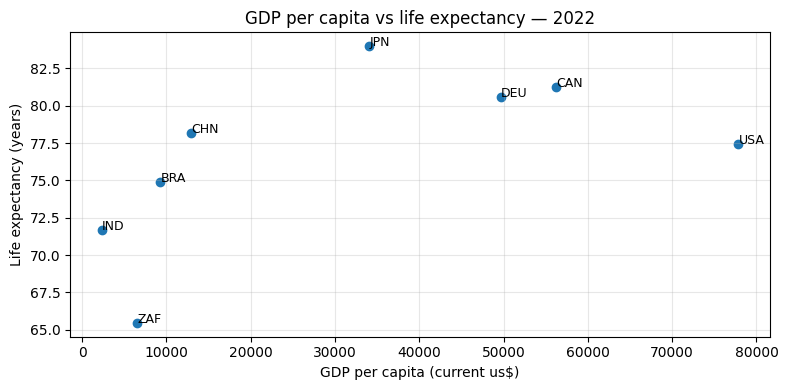

In [15]:
# Comparing "Life Expectancy" with "GDP per capita" for year 2022
latest_year = 2022

# indicator codes
life_expectancy_code = "SP.DYN.LE00.IN"
gdp_per_capita_code = "NY.GDP.PCAP.CD"

# slicing the latest year for both indicators
life_latest = analysis[(analysis["Indicator Code"] == life_expectancy_code) &
                       (analysis["Year"] == latest_year)][
                      ["Country Name", "Country Code", "Value"]
                      ].rename(columns={"Value": "life_expectancy"})

gdp_latest = analysis[(analysis["Indicator Code"] == gdp_per_capita_code) &
                      (analysis["Year"] == latest_year)][
    ["Country Name", "Country Code", "Value"]
].rename(columns={"Value": "gdp_per_capita"})

# joining on country
scatter_df = (gdp_latest.merge(life_latest, on=["Country Name","Country Code"], how="inner"))

plt.figure(figsize=(8, 4))
plt.scatter(scatter_df["gdp_per_capita"], scatter_df["life_expectancy"])

# annotating each point with country code
for i, row in scatter_df.iterrows():
    plt.text(row["gdp_per_capita"], row["life_expectancy"], row["Country Code"], fontsize=9)

plt.title(f"GDP per capita vs life expectancy — {latest_year}")
plt.xlabel("GDP per capita (current us$)")
plt.ylabel("Life expectancy (years)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


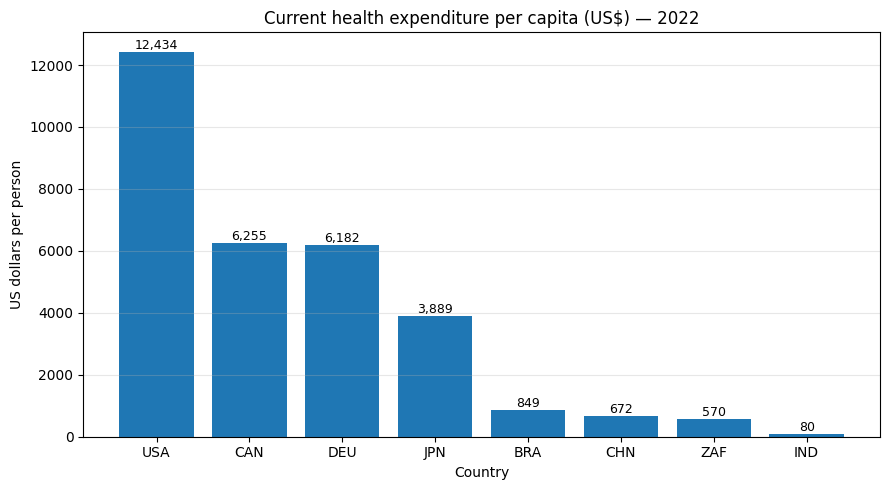

In [16]:
latest_year = 2022

# indicator code for health spend per capita
health_spend_code = "SH.XPD.CHEX.PC.CD"

health_latest = (analysis[(analysis["Indicator Code"] == health_spend_code) &
                          (analysis["Year"] == latest_year)]
                 [["Country Code", "Value"]]
                 .sort_values("Value", ascending=False)
                 .reset_index(drop=True))

# bar positions & labels
x_pos = range(len(health_latest))
x_labels = health_latest["Country Code"]
y_vals = health_latest["Value"]

plt.figure(figsize=(9, 5))
bars = plt.bar(x_pos, y_vals)

plt.title(f"Current health expenditure per capita (US$) — {latest_year}")
plt.xlabel("Country")
plt.ylabel("US dollars per person")
plt.xticks(x_pos, x_labels)

# adding value labels on top of bars
for i, v in enumerate(y_vals):
    plt.text(i, v, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()
